**Problem Statement: Analyzing Weather Data from OpenWeatherMap API**

Dataset: Weather data retrieved from OpenWeatherMap API
Description: The goal is to interact with the OpenWeatherMap API to retrieve weather data
for a specific location and perform data modeling and visualization to analyze weather
patterns over time.
Tasks to Perform:
1. Register and obtain API key from OpenWeatherMap.
2. Interact with the OpenWeatherMap API using the API key to retrieve weather data for
a specific location.
3. Extract relevant weather attributes such as temperature, humidity, wind speed, and
precipitation from the API response.
4. Clean and preprocess the retrieved data, handling missing values or inconsistent
formats.
5. Perform data modeling to analyze weather patterns, such as calculating average
temperature, maximum/minimum values, or trends over time.
6. Visualize the weather data using appropriate plots, such as line charts, bar plots, or
scatter plots, to represent temperature changes, precipitation levels, or wind speed
variations.
7. Apply data aggregation techniques to summarize weather statistics by specific time
periods (e.g., daily, monthly, seasonal).
8. Incorporate geographical information, if available, to create maps or geospatial
visualizations representing weather patterns across different locations.
9. Explore and visualize relationships between weather attributes, such as temperature
and humidity, using correlation plots or heatmaps.

In [1]:
import requests
import pandas as pd
import datetime

# Set your OpenWeatherMap API key
api_key = 'fb365aa6104829b44455572365ff3b4e'

Get the lat(itude) and lon(gitude) from [here](https://www.latlong.net/).


In [2]:

# Set the location for which you want to retrieve weather data
lat = 18.184135
lon = 74.610764

#https://openweathermap.org/api/one-call-3#how       How to use api call
# Construct the API URL
api_url = f"http://api.openweathermap.org/data/2.5/forecast?lat={lat}&lon={lon}&appid={api_key}"


In [3]:

# Send a GET request to the API
response = requests.get(api_url)
weather_data = response.json()       #pass response to weather_data object(dictionary)


In [4]:
weather_data.keys()

dict_keys(['cod', 'message', 'cnt', 'list', 'city'])

In [5]:
weather_data['list'][0]

{'dt': 1692597600,
 'main': {'temp': 303.59,
  'feels_like': 304.37,
  'temp_min': 303.59,
  'temp_max': 303.59,
  'pressure': 1008,
  'sea_level': 1008,
  'grnd_level': 946,
  'humidity': 47,
  'temp_kf': 0},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02d'}],
 'clouds': {'all': 21},
 'wind': {'speed': 6.97, 'deg': 283, 'gust': 7.41},
 'visibility': 10000,
 'pop': 0,
 'sys': {'pod': 'd'},
 'dt_txt': '2023-08-21 06:00:00'}

In [6]:
len(weather_data['list'])

40

In [7]:
weather_data['list'][0]['weather'][0]['description']

'few clouds'

In [8]:
#getting the data from dictionary and taking into one variable
# Extract relevant weather attributes using list comprehension
temperatures = [item['main']['temp'] for item in weather_data['list']]      #it will extract all values (40) and putting into one variable
timestamps = [pd.to_datetime(item['dt'], unit='s') for item in weather_data['list']]
temperature = [item['main']['temp'] for item in weather_data['list']]
humidity = [item['main']['humidity'] for item in weather_data['list']]
wind_speed = [item['wind']['speed'] for item in weather_data['list']]
weather_description = [item['weather'][0]['description'] for item in weather_data['list']]

# Create a pandas DataFrame with the extracted weather data
weather_df = pd.DataFrame({
    'Timestamp': timestamps,
    'Temperature': temperatures,
    'humidity': humidity,
    'wind_speed': wind_speed,
    'weather_description': weather_description,
})

# Set the Timestamp column as the DataFrame's index
weather_df.set_index('Timestamp', inplace=True)

In [9]:
max_temp = weather_df['Temperature'].max()

In [10]:
max_temp

306.11

In [11]:
min_temp = weather_df['Temperature'].min()

In [12]:
min_temp

295.43

In [13]:
# Clean and preprocess the data

# Handling missing values
weather_df.fillna(0, inplace=True)  # Replace missing values with 0 or appropriate value

# Handling inconsistent format (if applicable)
weather_df['Temperature'] = weather_df['Temperature'].apply(lambda x: x - 273.15 if isinstance(x, float) else x)   # Convert temperature from Kelvin to Celsius

# Print the cleaned and preprocessed data
print(weather_df)

                     Temperature  humidity  wind_speed weather_description
Timestamp                                                                 
2023-08-21 06:00:00        30.44        47        6.97          few clouds
2023-08-21 09:00:00        30.74        46        8.72    scattered clouds
2023-08-21 12:00:00        29.69        50        8.51       broken clouds
2023-08-21 15:00:00        25.99        65        6.32    scattered clouds
2023-08-21 18:00:00        24.23        72        4.61    scattered clouds
2023-08-21 21:00:00        23.19        77        4.04          few clouds
2023-08-22 00:00:00        22.28        81        3.69    scattered clouds
2023-08-22 03:00:00        24.94        68        4.88     overcast clouds
2023-08-22 06:00:00        29.64        47        6.59     overcast clouds
2023-08-22 09:00:00        32.96        37        7.53    scattered clouds
2023-08-22 12:00:00        30.03        48        9.78       broken clouds
2023-08-22 15:00:00      

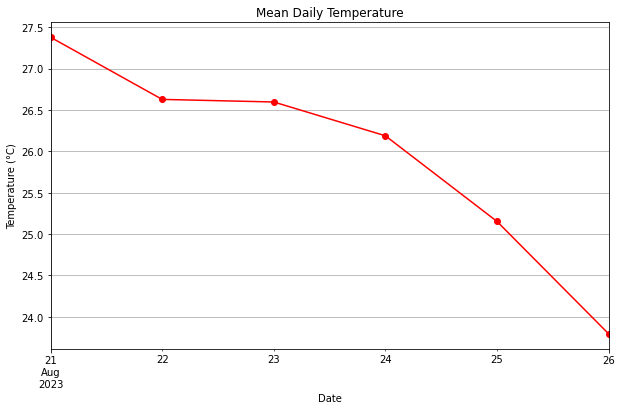

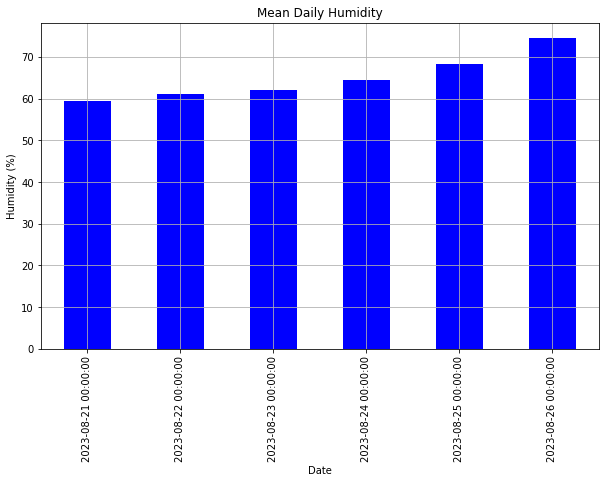

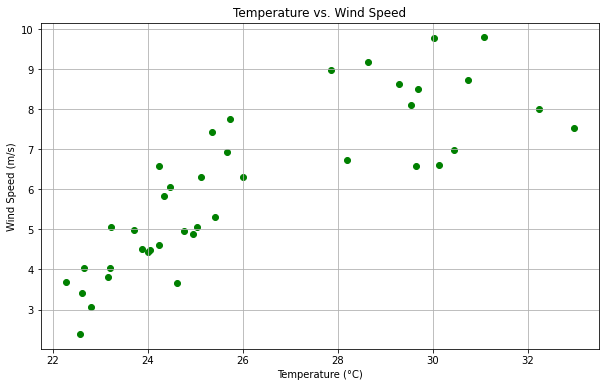

In [14]:
import matplotlib.pyplot as plt

daily_mean_temp = weather_df['Temperature'].resample('D').mean()
daily_mean_humidity = weather_df['humidity'].resample('D').mean()
daily_mean_wind_speed = weather_df['wind_speed'].resample('D').mean()

# Plot the mean daily temperature over time (Line plot)
plt.figure(figsize=(10, 6))
daily_mean_temp.plot(color='red', linestyle='-', marker='o')
plt.title('Mean Daily Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

# Plot the mean daily humidity over time (Bar plot)
plt.figure(figsize=(10, 6))
daily_mean_humidity.plot(kind='bar', color='blue')
plt.title('Mean Daily Humidity')
plt.xlabel('Date')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.show()

# Plot the relationship between temperature and wind speed (Scatter plot)
plt.figure(figsize=(10, 6))
plt.scatter(weather_df['Temperature'], weather_df['wind_speed'], color='green')
plt.title('Temperature vs. Wind Speed')
plt.xlabel('Temperature (°C)')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)
plt.show()

###Heatmap

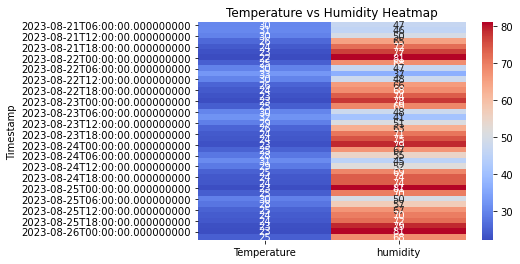

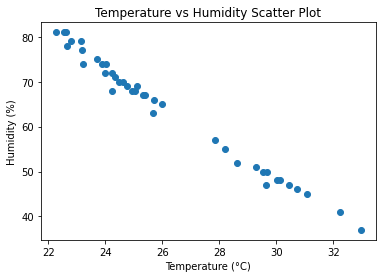

In [15]:
import seaborn as sns

heatmap_data = weather_df[['Temperature', 'humidity']]
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm')
plt.title('Temperature vs Humidity Heatmap')
plt.show()

# Create a scatter plot to visualize the relationship between temperature and humidity
plt.scatter(weather_df['Temperature'], weather_df['humidity'])
plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.title('Temperature vs Humidity Scatter Plot')
plt.show()

In [17]:
pip install geopandas

  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2
Note: you may need to restart the kernel to use updated packages.


In [19]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


###Geospatial Map

In [20]:
import requests
import pandas as pd
import geopandas as gpd
import folium

# Set your OpenWeatherMap API key
api_key = 'fb365aa6104829b44455572365ff3b4e'

# Specify the locations for which you want to retrieve weather data
locations = ['London', 'Paris', 'New York']

weather_df = pd.DataFrame()

# Retrieve weather data for each location
for location in locations:
    # Construct the API URL
    api_url = f'http://api.openweathermap.org/data/2.5/weather?q={location}&appid={api_key}'

    # Send a GET request to the API
    response = requests.get(api_url)
    weather_data = response.json()

    # Extract relevant weather attributes
    temperature = weather_data['main']['temp']
    humidity = weather_data['main']['humidity']
    wind_speed = weather_data['wind']['speed']
    latitude = weather_data['coord']['lat']
    longitude = weather_data['coord']['lon']

    # Create a DataFrame for the location's weather data
    location_df = pd.DataFrame({
        'Location': [location],
        'Temperature': [temperature],
        'Humidity': [humidity],
        'Wind Speed': [wind_speed],
        'Latitude': [latitude],
        'Longitude': [longitude]
    })

    # Append the location's weather data to the main DataFrame
    weather_df = weather_df.append(location_df, ignore_index=True)


In [21]:
weather_df

,Location,Temperature,Humidity,Wind Speed,Latitude,Longitude
0,London,288.41,94,4.12,51.5085,-0.1257
1,Paris,290.75,81,3.09,48.8534,2.3488
2,New York,296.26,68,4.12,40.7143,-74.0060


In [22]:

# Load a world map shapefile using geopandas
world_map = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

# Rename the column used for merging in the world map DataFrame
world_map.rename(columns={'name': 'Location'}, inplace=True)

# Merge the weather data with the world map based on location
weather_map = world_map.merge(weather_df, on='Location')

# Create a folium map centered around the mean latitude and longitude of all locations
map_center = [weather_df['Latitude'].mean(), weather_df['Longitude'].mean()]
weather_map_folium = folium.Map(location=map_center, zoom_start=2)

# Add weather markers to the folium map
for index, row in weather_map.iterrows():
    location = [row['Latitude'], row['Longitude']]
    temperature = row['Temperature']
    marker_text = f'Temperature: {temperature} K'
    folium.Marker(location, popup=marker_text, icon=folium.Icon(icon='cloud', color='red')).add_to(weather_map_folium)

# display the folium map
weather_map_folium


<ipython-input-22-c9bd718791be>:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_cities' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world_map = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))


In [23]:
type(weather_map_folium)

folium.folium.Map